# Módulo 1: Desarrollo del Business Case

# EVALUACIÓN DE LA EJECUCIÓN DE LOS RECURSOS DE INVERSIÓN DE LAS ENTIDADES DEL DISTRITO CAPITAL Y SU RELACIÓN DIRECTA CON EL CUMPLIMENTO DEL PMR “PRODUCTOS METAS RESULTADOS”
Selección del proyecto

Se selecciona la base de datos de ejecución presupuestal del Presupuesto Anual del Distrito Capital para la vigencia 2023 y el reporte de seguimiento cuantitativo y cualitativo de los indicadores de objetivo y producto de la herramienta Productos, Metas y Resultados 2023, datos que se encuentran publicados mediante anexos en la página de la Secretaría Distrital de Hacienda y de los cuales se cuenta con las bases en formato Excel.

## Definición del problema o la oportunidad
Tomar decisiones acertadas en la asignación de los recursos, en la medida que estos son escasos y las necesidades se incrementan, se convierten en un reto para las administraciones gubernamentales que conlleva a la generación de metodologías que permitan evaluar si la distribución de estos recursos en los presupuestos es óptima (eficaz) y eficiente.

La asignación de recursos en el Distrito Capital la realiza la Secretaría Distrital de Hacienda mediante un enfoque de Presupuesto Orientado a Resultados, el cual se desarrolla a través del instrumento PMR Productos, Metas y Resultados.

El PMR es una herramienta utilizada por el Distrito Capital durante el ciclo presupuestal para la Programación, Ejecución, Seguimiento y Evaluación de los recursos públicos, en la que las entidades distribuyen el presupuesto de funcionamiento e inversión en los bienes y servicios (productos) que entregan a la ciudadanía.

Actualmente se cuantifica la ejecución de recursos de inversión (ejecución) y el seguimiento a las metas definidas para entregar los productos a la ciudadanía (planeación) de manera independiente, y no se está realizando una relación directa que permita determinar si la planeación y ejecución de los recursos se está dando de manera efectiva, es decir que los recursos invertidos se están programando de una manera óptima y están contribuyendo conforme a lo planeado.

## Objetivos del proyecto
## Objetivo general

Realizar una metodología de cálculo que evalué anualmente en las entidades de la Administración Central y establecimientos públicos del Distrito Capital, la efectividad en la planeación de los productos entregados a la ciudadanía y su relación con la ejecución de los recursos inversión.

## Objetivos específicos

Generar insumos técnicos para la toma de decisiones durante la asignación de la cuota global del gasto.

Reducir el margen de error en el procesamiento, revisión y análisis de la información que reportan las entidades del Distrito en el PMR y automatizar el proceso de cálculo.

Diseñar un tablero de control que evidencie los principales resultados del análisis y facilite la toma de decisiones.

## Solución propuesta
- Se propone hacer un alistamiento de las dos bases de datos insumo: 1. Ejecución presupuestal y 2. Reporte de seguimiento cuantitativo y cualitativo PMR.

- En el reporte de seguimiento es necesario realizar validaciones que permitan identificar que los indicadores de producto y objetivo fueron reportados de manera correcta acorde a su naturaleza y proceder a realizar las respectivas correcciones.

- Una vez se cuente con las bases listas, mediante técnicas de procesamiento de la información se procederá a alistar la base principal que servirá de base para evaluar la eficiencia en la planeación de los productos y la ejecución de recursos asociados a estos.

- La ejecución presupuestal se evaluará a partir de la programación inicial, compromisos y giros realizados con corte al 31 de diciembre de la respectiva vigencia y se asignaran rangos para dar una calificación.

- La planeación se evaluará a partir del avance alcanzado en los indicadores de producto, se ponderará por producto de acuerdo a su participación en el total de recursos de inversión asignados a cada entidad y se le asignará a cada producto una calificación mediante rangos.

- Tanto en la planeación como en la ejecución se castigará la sub ejecución y en la planeación se castigará la sobre ejecución.

- Se realizará una relación directa entre los porcentajes de ejecución de recursos y cumplimiento de la planeación del PMR y se dará puntos en la medida que dicha ejecución sea pareja y tenga un porcentaje superior al 90%


In [129]:
# from google.colab import drive
# drive.mount('/content/drive')



In [130]:
# %ls "/content/drive/MyDrive/Datasets"

In [131]:
# !pip install unidecode

**Retroalimentación**

1. El estudiante expuso de manera clara y detallada el problema y los objetivos del caso de negocio derivados de la base de datos seleccionada.
2. La solución general propuesta por el estudiante aborda adecuadamente el problema presentado, ofreciendo un enfoque sólido y coherente.
3. Se aprecia que el estudiante presentó de forma completa la base de datos y las variables que serán utilizadas en el desarrollo del proyecto, lo que demuestra una comprensión adecuada de los recursos disponibles.
4. Solo una observación: ¿Se utilizará una sola base de datos o ambas? Me parece que actualmente solo está cargada una base de datos en Colab. ¿Habrá alguna razón específica para utilizar una sola base de datos o se considerará incorporar la segunda en el desarrollo del proyecto? **Rta: Se incorporó la segunada base durante el desarrollo del proyecto.**
**Evaluación:** Satisfactoria. Se cumple con los requisitos establecidos y se evidencia un buen entendimiento de los aspectos fundamentales del proyecto.

# Módulo 2: Análisis Exploratorio de Datos (EDA)

In [132]:
# -*- coding: utf-8 -*-
# importacion de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from unidecode import unidecode
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
import seaborn as sns
import warnings


In [133]:
# importacion de los datos
base_ejecucion = pd.read_excel('./data/ejecucion_2023.xlsx', sheet_name='diciembre Original DIC2023')
base_seguimiento = pd.read_excel('./data/seguimiento_2023.xlsx', sheet_name='ind_pro_dic23')


In [134]:
base_ejecucion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Vigencia                      22131 non-null  int64         
 1   Fecha Inicial                 22131 non-null  datetime64[ns]
 2   Fecha Final                   22131 non-null  datetime64[ns]
 3   Centro gestor                 22131 non-null  object        
 4   TIPO ENTIDAD CEGE             21034 non-null  object        
 5   Programa de financiación      22131 non-null  object        
 6   Descripcion del Programa      22131 non-null  object        
 7   Posición presupuestaria       22131 non-null  object        
 8   Descripción Pospre            22131 non-null  object        
 9   Fondo                         22131 non-null  object        
 10  Descripcion del Fondo         22131 non-null  object        
 11  Per.presup.                 

In [135]:
base_seguimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Centro gestor             505 non-null    object 
 1   Unnamed: 1                505 non-null    object 
 2   Objetivo                  505 non-null    object 
 3   Unnamed: 3                505 non-null    object 
 4   Agrupador Producto        505 non-null    object 
 5   Unnamed: 5                505 non-null    object 
 6   Indicador de Producto     505 non-null    int64  
 7   Unnamed: 7                505 non-null    object 
 8   Naturaleza                505 non-null    object 
 9   Periodicidad              505 non-null    object 
 10  Unidad de Medida          505 non-null    object 
 11  Linea Base                447 non-null    float64
 12  Meta Plan                 505 non-null    float64
 13  Meta Anual                505 non-null    float64
 14  DICIEMBRE 

# Identificación de las variables a utilizar:

## Base Ejecución presupuestal 2023

- Vigencia (int64): corresponde a la vigencia presupuestal
- Centro gestor (object): corresponde al código asignado a la entidad distrital con sus respectivas unidades ejecutoras, los primeros cuatro códigos hacen referencia únicamente a la entidad, los demás a la únidad ejecutora.
- Programa de financiación (object): codificación asignada al programa presupuestal, de acuerdo con el plan de cuentas presupuestal. Mediante la codificación es posible identificar la naturaleza del gasto, para el ejercicio propuesto es necesario identificar el gasto de inversión directa el cual se clasifica iniciando con la codificación O23.
- Elemento PEP (object): codificación unica que contiene el código de la entidad, unidad ejecutora, producto PMR, codigo MGA y proyecto de inversión Plan de Desarrollo
- Descripción Elemento PEP (object): nombre del producto PMR
- Apropiación Disponible (int64): recursos apropiados con los que cuenta la entidad despues de realizar movimientos presupuestales, consiste en la disponifilidad a comprometer.
- Compromisos Acumulados (int64): recursos comprometidos mediante registros presupuestales expedidos
- Giros Acumulados (int64): recursos girados, estos evidencian la ejecución real de los recursos.

## Base Seguimiento PMR 2023

- Centro gestor (object): corresponde al código asignado a la entidad distrital con sus respectivas unidades ejecutoras, los primeros cuatro códigos hacen referencia únicamente a la entidad, los demás a la únidad ejecutora.
- Agrupador Producto (object): codificación que identifica el producto PMR
- Indicador de Producto (int64): código asignado de los indicadores de producto que miden mediante metas el avance para alcanzar los productos PMR propuestos.
- Naturaleza (object):  categoriza el tipo de indicador en stock, acumulado, capacidad y reducción
- Periodicidad (object): identifica la periodicidad de medición del indicador de producto en mensual, trimestral, semestral, anual y bienal.
- Unidad de medida (object): asigna la unidad de medida del indicador entre valor (número) o porcentaje.
- Línea base (float64): de acuerdo a la naturaleza del indicador registra el punto de partida para la medición de indicador.
- Meta Plan (float64): meta definida para el indicador para la vigencia del PMR, comprende varias vigencias.
- Meta Anual (float64): meta que se espera cumplir durante la anualidad

# Depuración de la base de datos:




Se define una funcion para cambiar nombres a las columnas de las bases ejecucion y seguimiento, pasando a minusculas, quitando espacios y tildes

In [136]:
def limpieza_titulos (base):
    base_mod = base.rename(columns = lambda col: col.lower())
    base_mod = base_mod.rename(columns = lambda x: x.strip().replace(' ', '_'))
    base_mod = base_mod.rename(columns =  lambda x: unidecode(x))
    return base_mod

base_ejecucion = limpieza_titulos(base_ejecucion)
base_seguimiento = limpieza_titulos(base_seguimiento)



In [137]:
base_ejecucion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   vigencia                      22131 non-null  int64         
 1   fecha_inicial                 22131 non-null  datetime64[ns]
 2   fecha_final                   22131 non-null  datetime64[ns]
 3   centro_gestor                 22131 non-null  object        
 4   tipo_entidad_cege             21034 non-null  object        
 5   programa_de_financiacion      22131 non-null  object        
 6   descripcion_del_programa      22131 non-null  object        
 7   posicion_presupuestaria       22131 non-null  object        
 8   descripcion_pospre            22131 non-null  object        
 9   fondo                         22131 non-null  object        
 10  descripcion_del_fondo         22131 non-null  object        
 11  per.presup.                 

Se asignan nombres a las columnas que no tenían nombres asignados.

In [138]:
mapeo_nombres = {'unnamed:_1': 'nombre_centro_gestor',
                 'unnamed:_3': 'nombre_objetivo',
                 'unnamed:_5': 'nombre_producto',
                 'unnamed:_7': 'nombre_indicador_producto', }
base_seguimiento = base_seguimiento.rename(columns=mapeo_nombres)
base_seguimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   centro_gestor              505 non-null    object 
 1   nombre_centro_gestor       505 non-null    object 
 2   objetivo                   505 non-null    object 
 3   nombre_objetivo            505 non-null    object 
 4   agrupador_producto         505 non-null    object 
 5   nombre_producto            505 non-null    object 
 6   indicador_de_producto      505 non-null    int64  
 7   nombre_indicador_producto  505 non-null    object 
 8   naturaleza                 505 non-null    object 
 9   periodicidad               505 non-null    object 
 10  unidad_de_medida           505 non-null    object 
 11  linea_base                 447 non-null    float64
 12  meta_plan                  505 non-null    float64
 13  meta_anual                 505 non-null    float64

In [139]:
""" Se crea una columna para despues solo sacar un fragmento del codigo, para
identificar el programa de financiación """

columna_inversion = base_ejecucion["programa_de_financiacion"]
base_ejecucion['inversion'] = columna_inversion.str.slice(0,3)

"""se revisa el tipo de dato de la columna creada inversion, para poder hacer el filtro """
base_ejecucion



,vigencia,fecha_inicial,fecha_final,centro_gestor,tipo_entidad_cege,programa_de_financiacion,descripcion_del_programa,posicion_presupuestaria,descripcion_pospre,fondo,...,cdp_acumulado,saldo_apropiacion_disponible,compromisos_acumulados,saldo_p._comprometer,giros_acumulados_ppto,saldo_por_pagar,intensidad,aref,sector,inversion
0,2023,2023-01-01,2023-12-31,0137-01,AC,000000000000000010137,0137 - Programa Funcionamiento - SECRETARÍA DI...,O211010100101,Sueldo básico,1-100-F001,...,30734840701,1135299,30734840701,0,30734840701,0,NaN,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",000
1,2023,2023-01-01,2023-12-31,0137-01,AC,000000000000000010137,0137 - Programa Funcionamiento - SECRETARÍA DI...,O211010100102,"Horas extras, dominicales, festivos y recargos",1-100-F001,...,9020657961,353535039,9020657961,0,9020657961,0,NaN,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",000
2,2023,2023-01-01,2023-12-31,0137-01,AC,000000000000000010137,0137 - Programa Funcionamiento - SECRETARÍA DI...,O211010100103,Gastos de representación,1-100-F001,...,1316411819,25005181,1316411819,0,1316411819,0,NaN,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",000
3,2023,2023-01-01,2023-12-31,0137-01,AC,000000000000000010137,0137 - Programa Funcionamiento - SECRETARÍA DI...,O211010100104,Subsidio de alimentación,1-100-F001,...,3574437,161563,3574437,0,3574437,0,NaN,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",000
4,2023,2023-01-01,2023-12-31,0137-01,AC,000000000000000010137,0137 - Programa Funcionamiento - SECRETARÍA DI...,O211010100105,Auxilio de transporte,1-100-F001,...,6027310,288690,6027310,0,6027310,0,NaN,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22126,2023,2023-01-01,2023-12-31,0260-01,NaN,332000000000000000260,Gtos de Operación CANAL CAPITAL,42450208,Servicios prestados a las empresas y servicios...,3-100-F002,...,10704878558,129008108,10704878558,0,6438829332,4266049226,NaN,"EIC-CULTURA, RECREACIÓN Y DEPORTE","CULTURA, RECREACIÓN Y DEPORTE",332
22127,2023,2023-01-01,2023-12-31,0260-01,NaN,332000000000000000260,Gtos de Operación CANAL CAPITAL,42450209,"Servicios para la comunidad, sociales y person...",3-100-F002,...,4479247287,250521,4479247287,0,3625538879,853708408,NaN,"EIC-CULTURA, RECREACIÓN Y DEPORTE","CULTURA, RECREACIÓN Y DEPORTE",332
22128,2023,2023-01-01,2023-12-31,0260-01,NaN,332000000000000000260,Gtos de Operación CANAL CAPITAL,42450209,"Servicios para la comunidad, sociales y person...",3-200-F002,...,1625295158,13155592,1625295158,0,1490178858,135116300,NaN,"EIC-CULTURA, RECREACIÓN Y DEPORTE","CULTURA, RECREACIÓN Y DEPORTE",332
22129,2023,2023-01-01,2023-12-31,0260-01,NaN,000000000000000000260,0260 - Programa Funcionamiento - CANAL CAPITAL,43,DISPONIBILIDAD FINAL,0-000-0000,...,0,0,0,0,0,0,NaN,"EIC-CULTURA, RECREACIÓN Y DEPORTE","CULTURA, RECREACIÓN Y DEPORTE",000


In [140]:
""" se procede a filtrar el cod o23 que corresponde a inversion """

filtro_023 = base_ejecucion[base_ejecucion["inversion"] == 'O23']
base_ejecucion = filtro_023
base_ejecucion

,vigencia,fecha_inicial,fecha_final,centro_gestor,tipo_entidad_cege,programa_de_financiacion,descripcion_del_programa,posicion_presupuestaria,descripcion_pospre,fondo,...,cdp_acumulado,saldo_apropiacion_disponible,compromisos_acumulados,saldo_p._comprometer,giros_acumulados_ppto,saldo_por_pagar,intensidad,aref,sector,inversion
182,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,0,5365000,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23
183,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,0,44303000,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23
184,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,183181931,6561073,183181931,0,183181931,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23
185,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603480000007695,Generación de entornos de confianza para la pr...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,171024913,0,171024913,0,161288923,9735990,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23
186,2023,2023-01-01,2023-12-31,0137-01,AC,O23011605510000007776,Fortalecimiento de la gestión institucional y ...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,0,0,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994211,Servicios de recolección de desechos hospitala...,1-100-F001,...,33859534,0,33859534,0,22855529,11004005,2.0,EP-AMBIENTE,AMBIENTE,O23
21598,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,0,0,0,0,0,0,2.0,EP-AMBIENTE,AMBIENTE,O23
21599,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,7727894,0,7727894,0,7727894,0,2.0,EP-AMBIENTE,AMBIENTE,O23
21600,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,0,0,0,0,0,0,2.0,EP-AMBIENTE,AMBIENTE,O23


In [141]:
""" se extrae de codigo del centro gestor los primeros cuatro codigos que corresponden a la entidad distrital como unidad sin unidades ejecutoras """

colum_entidad = base_ejecucion["centro_gestor"]
base_ejecucion['entidad'] = colum_entidad.str.slice(0,4)
base_ejecucion


C:\Users\Ana Maria\AppData\Local\Temp\ipykernel_8448\2464813883.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,vigencia,fecha_inicial,fecha_final,centro_gestor,tipo_entidad_cege,programa_de_financiacion,descripcion_del_programa,posicion_presupuestaria,descripcion_pospre,fondo,...,saldo_apropiacion_disponible,compromisos_acumulados,saldo_p._comprometer,giros_acumulados_ppto,saldo_por_pagar,intensidad,aref,sector,inversion,entidad
182,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,5365000,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23,0137
183,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,44303000,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23,0137
184,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603420000007692,Consolidación de una ciudadanía transformadora...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,6561073,183181931,0,183181931,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23,0137
185,2023,2023-01-01,2023-12-31,0137-01,AC,O23011603480000007695,Generación de entornos de confianza para la pr...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,0,171024913,0,161288923,9735990,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23,0137
186,2023,2023-01-01,2023-12-31,0137-01,AC,O23011605510000007776,Fortalecimiento de la gestión institucional y ...,O231010200501,Aportes generales al sistema de riesgos labora...,1-100-F001,...,0,0,0,0,0,4.0,"AC-SEGURIDAD, CONVIVENCIA Y JUSTICIA","SEGURIDAD, CONVIVENCIA Y JUSTICIA",O23,0137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994211,Servicios de recolección de desechos hospitala...,1-100-F001,...,0,33859534,0,22855529,11004005,2.0,EP-AMBIENTE,AMBIENTE,O23,0229
21598,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,0,0,0,0,0,2.0,EP-AMBIENTE,AMBIENTE,O23,0229
21599,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,0,7727894,0,7727894,0,2.0,EP-AMBIENTE,AMBIENTE,O23,0229
21600,2023,2023-01-01,2023-12-31,0229-01,EP,O23011602340000007551,Servicio para la atención de animales en condi...,O232020200994339,Otros servicios de tratamiento y disposición d...,1-100-F001,...,0,0,0,0,0,2.0,EP-AMBIENTE,AMBIENTE,O23,0229


In [142]:
""" Se quita de la columna elemento PEP el caracter "/" y se extrae los primeros 10 digitos, que consisten en
el codigo del agrupador de la base de seguimiento, esta es la llave para poder unir las dos bases """

base_ejecucion["elemento_pep"] = base_ejecucion["elemento_pep"].str.replace("/", '')
columna_pep = base_ejecucion["elemento_pep"]
base_ejecucion['agrupador_producto'] = columna_pep.str.slice(0,10)
base_ejecucion.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13140 entries, 182 to 21601
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   vigencia                      13140 non-null  int64         
 1   fecha_inicial                 13140 non-null  datetime64[ns]
 2   fecha_final                   13140 non-null  datetime64[ns]
 3   centro_gestor                 13140 non-null  object        
 4   tipo_entidad_cege             13140 non-null  object        
 5   programa_de_financiacion      13140 non-null  object        
 6   descripcion_del_programa      13140 non-null  object        
 7   posicion_presupuestaria       13140 non-null  object        
 8   descripcion_pospre            13140 non-null  object        
 9   fondo                         13140 non-null  object        
 10  descripcion_del_fondo         13140 non-null  object        
 11  per.presup.               

C:\Users\Ana Maria\AppData\Local\Temp\ipykernel_8448\1082740879.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ana Maria\AppData\Local\Temp\ipykernel_8448\1082740879.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
""" se realiza la agrupacion por la columna agrupador producto, para las columnas
ApropiaciónDisponible,
Compromisos,
Giros
"""
columnas_guardar = ['centro_gestor', 'programa_de_financiacion', 'descripcion_elemento_pep', 'entidad', 'inversion' ]

grouped_df = base_ejecucion.groupby('agrupador_producto').agg({
    'apropiacion_disponible': 'sum',
    'compromisos_acumulados': 'sum',
    'giros_acumulados_ppto': 'sum'
}).reset_index()

base_agrupada = pd.merge(base_ejecucion[columnas_guardar + ['agrupador_producto']].drop_duplicates('agrupador_producto'), grouped_df, on='agrupador_producto')

base_agrupada


# with pd.ExcelWriter('./data/control1.xlsx') as writer:
#     base_agrupada.to_excel(writer, sheet_name='Hoja1', index=False)


,centro_gestor,programa_de_financiacion,descripcion_elemento_pep,entidad,inversion,agrupador_producto,apropiacion_disponible,compromisos_acumulados,giros_acumulados_ppto
0,0137-01,O23011603420000007692,IMPLEMENTACIÓN DE ESTRATEGIAS DE SEGURIDAD CIU...,0137,O23,PM01370101,56406000000,56005177262,42670651449
1,0137-01,O23011603470000007765,IMPLEMENTACIÓN DE ACCIONES PARA EL FORTALECIMI...,0137,O23,PM01370102,51504561001,49808486567,23301799766
2,0226-01,O23011605530000007839,CAPAS DE INFORMACIÓN GEOGRÁFICA DE LA IN,0226,O23,PM02260107,5384338236,5167387210,4661854138
3,0226-01,O23011605530000007839,ESTÁNDAR OGS-TSJ IMPLEMENTADO,0226,O23,PM02260108,2206026224,2064089160,1901869723
4,0226-01,O23011605520000007775,ENTIDADES TERRITORIALES QUE CONTRATAN EL,0226,O23,PM02260109,31153458309,28844760368,23352406568
...,...,...,...,...,...,...,...,...,...
343,0229-01,O23011601220000007560,SERVICIO DE CULTURA Y PARTICIPACIÓN CIUDADANA...,0229,O23,PM02290111,42845000,42845000,42845000
344,0229-01,O23011602340000007556,SERVICIO DE ATENCIÓN DE ANIMALES EN LA CASA EC...,0229,O23,PM02290110,86250000,86250000,78500000
345,0229-01,O23011602340000007551,SERVICIOS DE ATENCIÓN DE ANIMALES MEDIANTE ES...,0229,O23,PM02290107,878935120,878935120,613617756
346,0229-01,O23011602340000007551,SERVICIOS DE ATENCIÓN DE ANIMALES POR MEDIO DE...,0229,O23,PM02290108,176890366,176890366,165112033


Dado que una entidad puede tener más de un producto asociado, ser requiere calcular la importancia presupuestal de cada producto en la entidad teniendo en cuenta lo comprometido en cada producto sobre el total de recursos comprometidos por la entidad 

In [144]:
"""Se realiza la totalizacion de compromisos para sacar la participación por giros y la ejecución presupuestal por producto

Dado que una entidad puede tener más de un producto asociado, ser requiere calcular la importancia presupuestal de cada producto en la entidad teniendo 
en cuenta lo comprometido en cada producto sobre el total de recursos comprometidos por la entidad 
"""

# Se calcula la suma total de compromisos por entidad
total_giros_por_entidad = base_agrupada.groupby('entidad')['giros_acumulados_ppto'].sum().reset_index()
total_giros_por_entidad.columns = ['entidad', 'giros_acumulados_total']

# se fusionan las sumas totales con el DataFrame original
participaciones_producto = pd.merge(base_agrupada, total_giros_por_entidad, on='entidad')

# Se calcula  la participación de cada fila respecto al total por entidad para giros realizados
participaciones_producto['participacion_giros'] = (participaciones_producto['giros_acumulados_ppto'] / participaciones_producto['giros_acumulados_total']) * 100
participaciones_producto['ejecucion_producto'] = (participaciones_producto['giros_acumulados_ppto']/ participaciones_producto['apropiacion_disponible']) *100
participaciones_producto['ejecucion_producto_participacion'] = (participaciones_producto['ejecucion_producto']* (participaciones_producto['participacion_giros']/100))

total_ejecucion_ppto_entidad = participaciones_producto.groupby('entidad')['ejecucion_producto_participacion'].sum().reset_index()
total_ejecucion_ppto_entidad.columns = ['entidad', 'ejecucion_ppto']

total_ejecucion = pd.merge(participaciones_producto, total_ejecucion_ppto_entidad, on='entidad')




In [145]:
""" Indicadores con ejecución cualitativa """

#Se unen las bases para tener toda la información en un solo Data Frame

indicadores_fusuion = pd.merge(base_seguimiento,total_ejecucion, on='agrupador_producto', how='left')

indicadores_fusuion.info()
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   centro_gestor_x                   505 non-null    object 
 1   nombre_centro_gestor              505 non-null    object 
 2   objetivo                          505 non-null    object 
 3   nombre_objetivo                   505 non-null    object 
 4   agrupador_producto                505 non-null    object 
 5   nombre_producto                   505 non-null    object 
 6   indicador_de_producto             505 non-null    int64  
 7   nombre_indicador_producto         505 non-null    object 
 8   naturaleza                        505 non-null    object 
 9   periodicidad                      505 non-null    object 
 10  unidad_de_medida                  505 non-null    object 
 11  linea_base                        447 non-null    float64
 12  meta_pla

Debido a que las entidades reportan una ejecución cualitativa de sus productos a partir de la medición de indicadores, se hace necesario calcular la eficacia en la programación y ejecución de estos indicadores, entiéndase por eficacia cuando se cumple conforme lo programado, pues una sub-ejecución demuestra el no cumplimiento de las metas establecidas y una sobre ejecución evidencia una mala planeación en el entendido que lo programado hubiese sido posible realizarse con menos recursos.

Por lo anterior, se implementa una especie de castigo en la sobre-ejecución, de modo tal que si esta supera el 100% se reduzca la sobre- ejecución en proporción al valor superior, pero con un límite de 50%, es decir que si la sobre-ejecución es mayor al 150% se asigna un valor ejecutado de 50% y si la sobre ejecución está entre el 100% y el 150% se descuenta del 100% únicamente la diferencia.


In [146]:
""" Se calcula la ejecución cualitativa por indicador de producto"""

indicadores_fusuion['ejecucion_cualitativa_indicador'] = indicadores_fusuion['%'].fillna(0) + indicadores_fusuion['%.1'].fillna(0) + indicadores_fusuion['%.2'].fillna(0) + indicadores_fusuion['%.3'].fillna(0) + indicadores_fusuion['%.4'].fillna(0)

"""se incorpora un castigo por sobre ejecución"""



def transformar_porcentaje(valor):
    if valor > 150:
        return 50
    elif valor > 100:
        return 100 - (valor - 100)
    else:
        return valor
    
indicadores_fusuion['castigo'] = indicadores_fusuion['ejecucion_cualitativa_indicador'].apply(transformar_porcentaje)

indicadores_fusuion.info()

#with pd.ExcelWriter('./data/control2.xlsx') as writer:
#    indicadores_fusuion.to_excel(writer, sheet_name='Hoja1', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   centro_gestor_x                   505 non-null    object 
 1   nombre_centro_gestor              505 non-null    object 
 2   objetivo                          505 non-null    object 
 3   nombre_objetivo                   505 non-null    object 
 4   agrupador_producto                505 non-null    object 
 5   nombre_producto                   505 non-null    object 
 6   indicador_de_producto             505 non-null    int64  
 7   nombre_indicador_producto         505 non-null    object 
 8   naturaleza                        505 non-null    object 
 9   periodicidad                      505 non-null    object 
 10  unidad_de_medida                  505 non-null    object 
 11  linea_base                        447 non-null    float64
 12  meta_pla

#Visualización de datos



## Gráfico de líneas

Se realiza un gráfico de líneas para observar la asignación de recursos durante el ciclo presupuestal por entidad, de este gráfico se puede inferir como las entidades 112 (Secretaría de Educación del Distrito), 201 (Fondo Financiero de Salud) y 204 (Insitutto de Desarrollo Urbano), son las que mayores recursos tienen asignados.

Por otra parte se evidencia como los giros siempre están por debajo de los compromisos acumulados, evidenciando así que entre vigencias siempre quedan recursos para reservas.

Con esta metrica se puede identificar el desempeño de las entidades en terminos de "Apropiación Disponible", "Compromisos Acumulados" y "Giros Acumulados Ppto"

In [147]:
# Crear la figura del gráfico
grafico_linea = go.Figure()

# Definir las columnas que queremos incluir en el gráfico
columnas_a_incluir = ["apropiacion_disponible", "compromisos_acumulados", "giros_acumulados_ppto"]

# Agregar trazas solo para las columnas especificadas
for columna in columnas_a_incluir:
    if columna in base_ejecucion.columns:
        grafico_linea.add_trace(go.Bar(x=base_ejecucion["entidad"], y=base_ejecucion[columna], name=columna))

# Actualizar el diseño del gráfico
grafico_linea.update_layout(
    title='Asignación presupuestal por entidad',
    xaxis_title='Entidad',
    yaxis_title='Valor',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

# Mostrar el gráfico
grafico_linea.show()

## Gráfico de dispersión

Se realiza un gráfico de dispersión para entender la relación entre las variables "Apropiación Disponible" (en el eje x) y los "Compromisos Acumulados" (en el eje y) para cada entidad. Cada punto en el gráfico representa una entidad específica, y su posición en el gráfico indica cuánta "Apropiación Disponible" tiene en comparación con sus "Compromisos Acumulados".

La mayoría de entidades se encuentran ubicadas en un mismo cuadrante, dando a entender que estas entidades tienen valores similares en las variables.

Nuevamente sobresale la entidad 112 (Secretaría de Educación del Distrito) cuya posición está muy alejada del resto, por esta gráfica podría llegar a pensarse que se trata de un dato atípico, pero no es así dado que la mayoría del presupuesto del Distrito se invierte en educación.

In [148]:
grafico_dispercion = px.scatter(indicadores_fusuion,
                 x="apropiacion_disponible",
                 y="compromisos_acumulados",
                 hover_data=["entidad"],
                 title="Relación entre Apropiación Disponible y Compromisos Acumulados por Entidad")

grafico_dispercion.update_xaxes(title_text="Apropiación Disponible")
grafico_dispercion.update_yaxes(title_text="Compromisos Acumulados")

grafico_dispercion.show()

Se realiza un gráfico de dispersión para las variables Apropiación Disponible y Giros Acumulados, encontrándose un comportamiento similar al del anterior análisis

In [149]:
grafico_dispercion1 = px.scatter(indicadores_fusuion,
                 x="apropiacion_disponible",
                 y="giros_acumulados_ppto",
                 hover_data=["entidad"],
                 title="Relación entre Apropiación Disponible y Giros Acumulados por Entidad")

grafico_dispercion1.update_xaxes(title_text="Apropiación Disponible")
grafico_dispercion1.update_yaxes(title_text="Giros Acumulados")

grafico_dispercion1.show()

Se realiza un gráfico de dispersión para las variables Compromisos Acumulados y Giros Acumulados, encontrándose un comportamiento similar al del anterior análisis.

Así las cosas, se puede concluir que las variables analizadas están altamente correlacionadas entre sí, así mismo se evidencia que las variables están relacionadas de manera consistente entre sí, por lo anterior y debido a que el comportamiento entre las variables es similar se podría llegar a simplificar el análisis.

In [150]:
grafico_dispercion2 = px.scatter(indicadores_fusuion,
                 x="compromisos_acumulados",
                 y="giros_acumulados_ppto",
                 hover_data=["entidad"],
                 title="Relación entre Compromisos Acumulados y Giros Acumulados por Entidad")

grafico_dispercion2.update_xaxes(title_text="Compromisos Acumulados")
grafico_dispercion2.update_yaxes(title_text="Giros Acumulados")

grafico_dispercion2.show()

##Gráfico de caja y bigotes

Se realiza un gráfico de caja y bigotes para la Aprpopiación Disponible para identificar la Mediana, así como la dispersión de los datos de acuerdo a la distribución de los cuartiles, en este caso se encuentra que los datos no están dispersos.

Nuevamente se identifican datos que podrían entenderse como atípicos, en el entendido que se encuentran fuera de los "bigotes", muy por encima, sin embargo, estos valores corresponden a las entidades distritales previamente identificadas (Secretaría de Educación del Distrito, Fondo Financiero de Salud y el IDU), las cuales por su misionalidad manejan presupuestos mucho más altos que las demás entidades.

In [151]:
grafico_caja = px.box(indicadores_fusuion, y="apropiacion_disponible", title="Distribución de Apropiación Disponible por Entidad")

grafico_caja.show()

## Mapa de Calor

Se realiza un mapa de calor para la variable Apropiación disponible.

Cada celda del mapa de calor representa el valor de la apropiación disponible para una entidad específica.

Los colores más claros (amarillo, verde claro) indican valores más altos de apropiación disponible, mientras que los colores más ocuros (morados) indican valores más bajos.

Se evidencia como la distribución de recursos es similar entre las entidades pues la mayoría son moradas, a excepción de tres entidades en verde y la amarilla que sobresalen nuevamente (Secretaría de Educación del Distrito)



In [152]:


indicadores_fusuion.set_index('entidad', inplace=True)

mapa_calor = px.imshow(indicadores_fusuion[['apropiacion_disponible']].T,
                labels=dict(x="Entidad", y="Apropiación Disponible", color="Valor"),
                title="Mapa de Calor de Apropiación Disponible por Entidad",
                color_continuous_scale="viridis")


mapa_calor.show()

# Analisis Descriptivo

Sobre las variables analizadas, lo siguiente:

Apropiación Disponible: **texto en negrita**

La apropiación disponible presenta una variación entre las diferentes entidades, desde valores relativamente bajos hasta valores extremadamente altos, como se observa en la entidad 0112 (Secretaría de Educación del Distirto)con un valor de aproximadamente 22.98 billones.


**Compromisos Acumulados y Giros Acumulados:**

Se observa una tendencia similar en los compromisos acumulados y los giros acumulados.

Algunas entidades muestran una diferencia significativa entre los compromisos acumulados y los giros acumulados en comparación con la apropiación disponible, lo que podría indicar una baja ejecución del gasto en relación con los fondos disponibles.

**Comparación entre las Entidades:**

Se pueden identificar las entidades con los valores más altos y más bajos de apropiación disponible, compromisos acumulados y giros acumulados para comprender mejor las diferencias entre estas es importante enteder la misionalidad de las mismas y la prioridad que en el gobierno se le dio a los temas que estas abarcan. Por ejemplo aquellos temas asociados al cumpliiento de derechos básicos como la educación y la salud sí o sí tienen una asignación mucho más alta de recursos.







# 3. MODELO DE APRENDIZAJE AUTOMÁTICO 

Para el análisis se cuenta con un grupo de 42 entidades a las cuales se les asignaron recursos para el cumplimiento de su misionalidad, con los cálculos de eficiencia final se puede hacer una clasificación inicial de la eficiencia con rangos de 0 a 50 para deficiente, de 50 a70 baja, de 70 a 90 media y de 90 a 100 optima.

No obstante, si bien la variable de eficiencia final podría ser la variable dependiente del modelo, se aplica un modelo no supervisado de clustering a partir de las variables de ejecución presupuestal, ejecución cualitativa y coherencia, para que el modelo clasifique las entidades en diferentes grupos que permitan identificar patrones de conducta presupuestal similares y determinar en estos acciones precisas a desarrollar.

Se inicia aplicando el modelo k-means con k=4 de modo tal que se pueda comparar los resultados del modelo con el índice de eficiencia propuesto.
Para la implementación del modelo se deben realizar los siguientes cálculos previos en la base:


In [153]:
indicadores_fusuion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0102 to 0501
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   centro_gestor_x                   505 non-null    object 
 1   nombre_centro_gestor              505 non-null    object 
 2   objetivo                          505 non-null    object 
 3   nombre_objetivo                   505 non-null    object 
 4   agrupador_producto                505 non-null    object 
 5   nombre_producto                   505 non-null    object 
 6   indicador_de_producto             505 non-null    int64  
 7   nombre_indicador_producto         505 non-null    object 
 8   naturaleza                        505 non-null    object 
 9   periodicidad                      505 non-null    object 
 10  unidad_de_medida                  505 non-null    object 
 11  linea_base                        447 non-null    float64
 12  meta_plan

*Prueba del modelo k-means con cuatro grupos*

Se aplica el modelo k-means indicando un k = 4, dicha asignación de clusters se realiza tomando como base las variables ejecución producto la cual mide el nivel de ejecución presupuestal por producto  y la variable castigo la cual asigna un valor a la ejecución cualitativa de los indicadores de producto.

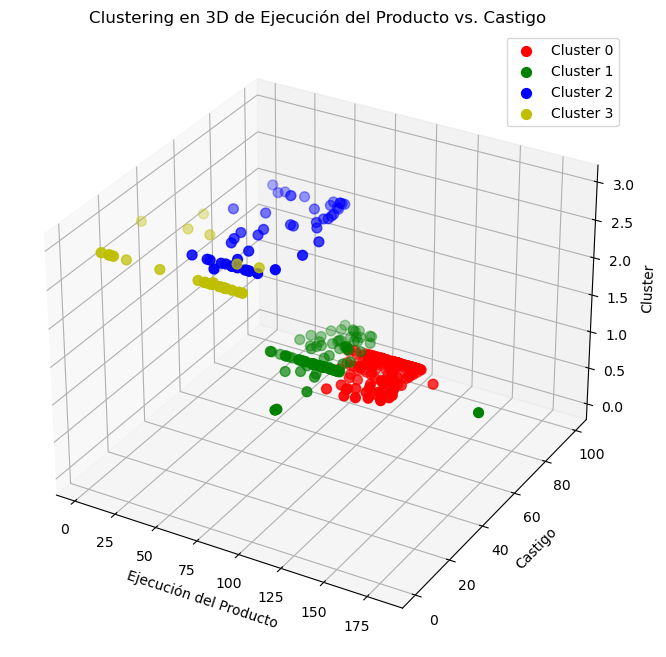

     ejecucion_producto     castigo  cluster agrupador_producto  \
0                   NaN   79.518987        0         PM01020108   
1             90.702993   80.463793        0         PM01020111   
2             85.801450  100.000000        0         PM01040121   
3             85.801450  100.000000        0         PM01040121   
4             93.770368  100.000000        0         PM01040122   
..                  ...         ...      ...                ...   
500           18.266017    0.000000        3         PM02300101   
501           18.266017    0.000000        3         PM02300101   
502           13.667667    0.000000        3         PM02300102   
503           13.667667    0.000000        3         PM02300102   
504           20.846345    0.000000        3         PM02300104   

                                  nombre_centro_gestor  \
0                           PERSONERÍA DE BOGOTÁ, D.C.   
1                           PERSONERÍA DE BOGOTÁ, D.C.   
2    SECRETARÍA GENER

In [154]:
# Se seleccionan las columnas 59 y 63
X = indicadores_fusuion[['ejecucion_producto', 'castigo']].copy()
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# se obtienen las etiquetas y se anaden al data frame
labels = kmeans.labels_
indicadores_fusuion['cluster'] = labels

# Se crea la figura en 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Se definen los colores para los clusters
colors = ['r', 'g', 'b', 'y']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']


for cluster_num in range(4):
    cluster_data = indicadores_fusuion[indicadores_fusuion['cluster'] == cluster_num]
    ax.scatter(cluster_data['ejecucion_producto'],
               cluster_data['castigo'],
               cluster_data['cluster'],
               c=colors[cluster_num], label=cluster_labels[cluster_num], s=50)

ax.set_xlabel('Ejecución del Producto')
ax.set_ylabel('Castigo')
ax.set_zlabel('Cluster')
ax.set_title('Clustering en 3D de Ejecución del Producto vs. Castigo')

ax.legend()
plt.show()

# for cluster_num in range(4):
#     cluster_data = indicadores_fusuion[indicadores_fusuion['cluster'] == cluster_num]
#     print(f"\nDatos del Cluster {cluster_num}:")
#     print(cluster_data[['ejecucion_producto', 'castigo', 'cluster', 'agrupador_producto']])

# Lista para almacenar los datos de cada cluster
clusters_list = []

# Recorriendo los clusters y almacenando los datos en la lista
for cluster_num in range(4):
    cluster_data = indicadores_fusuion[indicadores_fusuion['cluster'] == cluster_num]
    cluster_df = cluster_data[['ejecucion_producto', 'castigo', 'cluster', 'agrupador_producto','nombre_centro_gestor','nombre_producto','indicador_de_producto','nombre_indicador_producto']]
    clusters_list.append(cluster_df)

# Concatenando todos los datos en un solo dataframe
clusters_df = pd.concat(clusters_list, ignore_index=True)

# Mostrando el dataframe resultante
print(clusters_df)

In [155]:
clusters_df.to_excel('clusters_output-3.xlsx', index=False, sheet_name='Clusters')

In [156]:
print(cluster_data)

        centro_gestor_x                               nombre_centro_gestor  \
entidad                                                                      
0104            0104-01  SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0117            0117-01       SECRETARÍA DISTRITAL DE DESARROLLO ECONÓMICO   
0121            0121-01                   SECRETARÍA DISTRITAL DE LA MUJER   
0122            0122-01         SECRETARÍA DISTRITAL DE INTEGRAC

Se calculan las metricas.

In [157]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calcular la métrica de Silhouette
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calcular la métrica de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")

# Calcular la métrica de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")

Silhouette Score: 0.575
Calinski-Harabasz Score: 579.846
Davies-Bouldin Score: 0.706


*** Se aplica el mismo modelo de cluster a k-means pero normalizando***

Se reemplazan infinitos, se eliminan NaN y se normalizan los datos.

In [158]:

# se reemplan infinitos
indicadores_fusuion.replace([np.inf, -np.inf], np.nan, inplace=True)

# se inmputan los NNA
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(indicadores_fusuion[['ejecucion_producto', 'castigo']])

X = pd.DataFrame(X_imputed, columns=['ejecucion_producto', 'castigo'])

# Se normalizan los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Se anaden las etiquetas al DataFrame original
indicadores_fusuion['cluster'] = labels


print(indicadores_fusuion[['ejecucion_producto', 'castigo', 'cluster']])

         ejecucion_producto    castigo  cluster
entidad                                        
0102              79.414461  50.000000        1
0102              79.414461  50.000000        1
0102                    NaN  79.518987        3
0102                    NaN  50.000000        1
0102                    NaN  52.960000        1
...                     ...        ...      ...
0501              71.389493  50.000000        1
0501              84.632224  50.000000        1
0501              88.336544  50.000000        1
0501              98.512175  50.000000        1
0501             100.000000  50.000000        1

[505 rows x 3 columns]


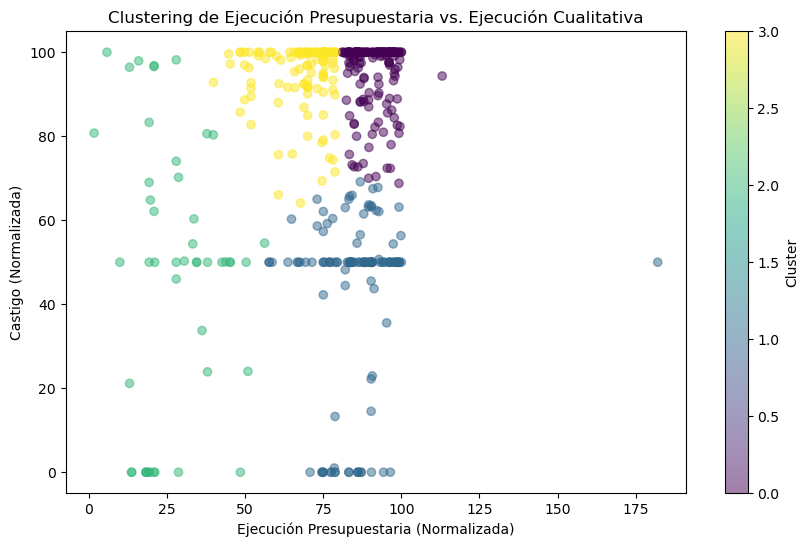

         ejecucion_producto    castigo  cluster
entidad                                        
0102              79.414461  50.000000        1
0102              79.414461  50.000000        1
0102                    NaN  79.518987        3
0102                    NaN  50.000000        1
0102                    NaN  52.960000        1
...                     ...        ...      ...
0501              71.389493  50.000000        1
0501              84.632224  50.000000        1
0501              88.336544  50.000000        1
0501              98.512175  50.000000        1
0501             100.000000  50.000000        1

[505 rows x 3 columns]


In [159]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_


indicadores_fusuion['cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(indicadores_fusuion['ejecucion_producto'], indicadores_fusuion['castigo'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Ejecución Presupuestaria (Normalizada)')
plt.ylabel('Castigo (Normalizada)')
plt.title('Clustering de Ejecución Presupuestaria vs. Ejecución Cualitativa')
plt.colorbar(label='Cluster')
plt.show()

print(indicadores_fusuion[['ejecucion_producto', 'castigo', 'cluster']])

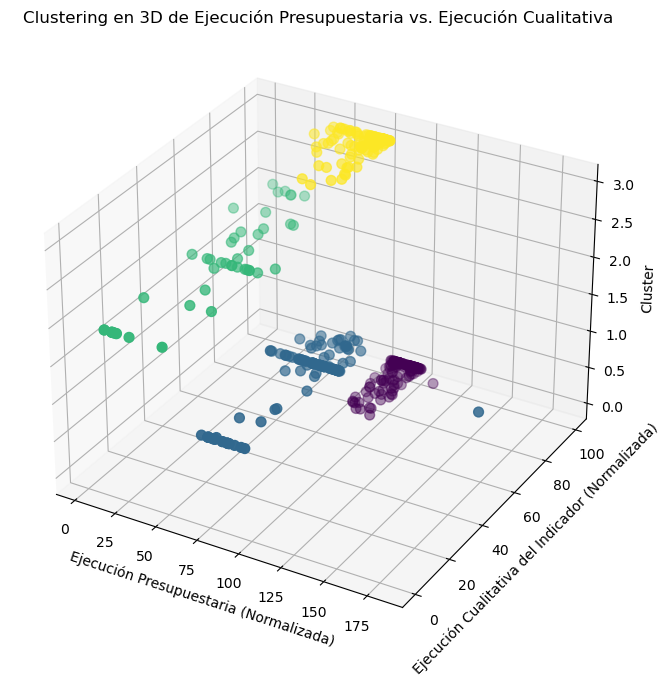

In [160]:

# Se crea el gráfico en 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(indicadores_fusuion['ejecucion_producto'], 
           indicadores_fusuion['castigo'], 
           indicadores_fusuion['cluster'], 
           c=labels, cmap='viridis', s=50)

ax.set_xlabel('Ejecución Presupuestaria (Normalizada)')
ax.set_ylabel('Ejecución Cualitativa del Indicador (Normalizada)')
ax.set_zlabel('Cluster')
ax.set_title('Clustering en 3D de Ejecución Presupuestaria vs. Ejecución Cualitativa')

plt.show()

In [161]:
for cluster_num in range(4):
    cluster_data = indicadores_fusuion[indicadores_fusuion['cluster'] == cluster_num]
    print(f"\nDatos del Cluster {cluster_num}:")
    print(cluster_data[['ejecucion_producto', 'castigo', 'cluster', 'entidad', 'agrupador_producto']])


Datos del Cluster 0:


KeyError: "['entidad'] not in index"

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calcular la métrica de Silhouette
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calcular la métrica de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")

# Calcular la métrica de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")

Silhouette Score: 0.449
Calinski-Harabasz Score: 459.349
Davies-Bouldin Score: 0.858


Al comparar el modelo sin normalizar vs normalizado se encuentra que las metricas son mejores en el modelo sin normalizar puesto que el Silhouette Score se acerca más al 1 (0.575 vs 0.449), no obstante al no estar ambos valores cerca al 1, se podría inferir que los puntos no están tan bien agrupados, pero que el cluster es moderadamente bueno.

En cuanto al Calinski-Harabasz Score en el modelo no normalizado el valor es mayor (579.846 vs 459.349) por su parte pareciera indicar que los clusteres están bien definidos y separados

Respecto al avies-Bouldin Score parece indicar que los clusteres son compactos, siendo más compacto en el modelo sin normalizar en el cual la metrica da un valor más bajo (0.7006 vs 0.858)

##	4. Resultados de los clusters

El modelo k-means con k=4 genera cuatro cluster cuya segmentación permite categorizar los indicadores de productos en cuatro estados efectividad

**Cluster 0 - Efectivo**

El cluster 0 representa el mejor de los escenarios, la ejecución de los indicadores de producto se ha dado de una manera efectiva, es decir se logró brindar a la ciudadanía los productos conforme a los planeado y de manera eficiente mediante una ejecución óptima de los recursos.

Sobre los indicadores ubicados en este cluster se recomienda identifcar las acciones acertadas que llevaron a un cumpliento adecuado, con el fin de poder replicarlas.

Así mismo, sobre estos indicadores se propone generar un incentivo de cumplimiento mediante una asignación adicional de recursos.

En esta categoria se clasificaron 287 inidicadores

**Cluster 1 - Eficiente**

Este escenario no es tan favorable, la ejecución presupuestal se realizó conforme a los recursos programados, sin embargo no se logró cumplir con las metas establecidas en los indicadores de producto por lo que los recursos financieros asignados no fueron utilizados de manera óptima. En los casos en los cuales la sobre ejecución cualitativa fue castigada se evidencia un suboptimo aprovechamiento de los recursos y una planeación inadecuada.

Se recomienda programar metas alcanzables previendo todos los escenarios para alcanzar su cumplimiento, sin poner en riesgo la prestación del servicio

Se recomienda optimizar los recursos asignados para alcanzar el cumplimiento de las metas, prestando una especial atención para que no se deaprovechen los recursos.

**Cluster 2 - Eficaz**

Si bien este escenario evidencia una baja ejecución de recursos y por ende una erronea programación de los mismos, se logró dar cunplimiento a las metas propuestas, lo anterior permite inferir que la entidad no requiere todos los recursos que solicitó para poder brindar sus productos.

Se recomienda reasignar los recursos de estos productos a otros con mejor comportamiento o a productos de otras entidades que sean más efectivos.

**Cluster 3 - Inefectivo**

Este es el peor de los escenarios, tanto la programación presupuestal como la planeación de metas no fue acertada, o debido a una inadecuada ejecución de los recursos no fue posible dar cumplimiento a las metas definidas en los indicadores de producto.

Se deben implementar acciones de seguimiento puntual para analizar las causas en el incumplimiento de las metas y en la ejecución de los recursos.


## 5. Conclusiones

Mediante el modelo k means fue posible clasificar los indicadores de producto según niveles de efectividad, encontrándose que la mayoría de los indicadores se encuentran en los cluster efectivo con 287 indicadores, lo anterior evidencia que las entidades realizan un esfuerzo por ejecutar sus recurses acorde a lo programado dando cumplimiento a su misionalidad según lo planeado.

No obstante lo anterior, existen falencias en cuanto a la eficacia, pues no se logra el cumplimiento planeado en alrededor de 169 indicadores de producto, lo que obedece a una mala planeación por sobreejecución o a un incumplimiento, lo que en ambos casos evidencia que se debe replantear la asignación de recursos.

Los modelos no supervisados de clustering son bastante útiles en casos como el que pretende abordar este estudio, dado quee permite clasificar los datos por categorías y sobre estás definir de acuerdo a sus características acciones específicas.


## 6. Visualización

Se realiza un tablero en Power Bi desktop para mostrar los principales resultados del modelo implementado:

En la hoja 1 Indicadores de Producto según Efectividad es posible visualizar la distribución total de indicadores de producto por cluster, así cómo identificar las entidades "más efectivas" es decir con la mayoría de indicadores de producto efectivos y las entidades menos efectivas con la mayoría de indicadores de producto inefectivos.

![Texto alternativo](https://drive.google.com/file/d/1l2JuXFp0pI2MW3eKFgRQ3-KDEJ6xS5zp/view?usp=drive_link)



En la segunda hoja es posible interactuar, revisando el estado general por entidad mediante un filtro, de modo tal que es posible identificar cuantos indicadores fueron incorporados en cada uno de los cluster, así mismo, al dar click en la barra respectiva del cluster se muestran los indicadores de producto que están en este con su respectiva ejecución. Por último, en esta hoja se proyecta la recomendación que aplica según el caso.

![Texto alternativo](https://drive.google.com/file/d/1A4scEKXJu5g1Em95k1gAnIr_e2J2d9Kq/view?usp=drive_link)

## 7.	Recomendaciones sobre el modelo

Si bien el modelo k-means permite definir el número de clusters y con ello realizar de manera más facil la categorización en niveles de efectividad, es posible que otros modelos de clutering clasifiquen de manera más acertada los indicadores de producto, pues en el cluster 3 algunos indicadores presentan niveles de eficiencia altos, no obstante, lo anterior se constituye en una propuesta para mejorar el modelo mediante la clasificación de los indicadores de prodcuto en un mayor número de clusters y por ende en la definición de más categorías que permitan la implementación de acciones más puntuales.

Por otro lado, se recomienda incorporar variables adicionales que permitan identificar cuales productos son prioritarios bien sea por el cumplimiento de dispocisiones normativas o porque se contituyen en bienes o servicios indispensables para la ciudanía, con el fin de poder prestar a estos una mayor atención en su seguimiento e implemetar acciones inmediatas que garanticen su cumplimiento y la correcta asignación de recursos.
